**Disciplina: ACA052 - Meteorologia Sinótica I**

Monitor: Ronald Guiuseppi Ramírez Nina

**Disciplina: ACA052 - Meteorologia Sinótica I**

Monitor: Ronald Guiuseppi Ramírez Nina

Ph.D. Student  at Department of Atmospheric Sciences - Institute of Astronomy, Geophysics and Atmospheric Sciences - University of São Paulo, São Paulo, Brazil

1. Instalando pacotes

In [ ]:
!pip install imgaug
!pip install siphon

# Instalando a Biblioteca Pygrib
!pip install pygrib
#print('\n')

# Instalando a Biblioteca Cartopy
!pip install cartopy
!pip install shapely --no-binary shapely --force
#print('\n')

# Instalando a Biblioteca MetPy
!pip install MetPy
#print('\n')

# Instalando a Biblioteca Boto3
!pip install boto3
#print('\n')

# Instalando a Biblioteca NetCDF4
!pip install netcdf4
#print('\n')

# Instalando / atualizando a Biblioteca GDAL
#!apt-add-repository -y ppa:ubuntugis/ubuntugis-unstable
#!add-apt-repository -y ppa:ubuntugis/ppa
#!apt-get install gdal-bin
#!pip install 'gdal==3.0.4'
#print('\n')

# Install ImageMagick
#!sudo apt install imagemagick
#print('\n')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 85.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.9/280.9 kB 6.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Created wheel for shapely: filename=shapely-2.0.4-cp310-cp310-linux_x86_64.whl size=1028616 sha256=7f03b8eb3656ae892c52a1ee590b1c21f136d2d141aad673e8805d8291df9eeb
  Stored in directory: /root/.cache/pip/wheels/85/0b/57/c3140e472fde452aa215492a886f7859aeba06f6b47ae35ee9
Successfully built shapely
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.

2. Baixando arquivos do shapefile

In [ ]:
# Baixando o shapefile dos estados brasileiros
!wget -c https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
#print('\n')

# Descomprimindo o arquivo de shapefile dos estados brasileiros
!unzip -o br_unidades_da_federacao.zip
#print('\n')

# Baixando o shapefile dos estados / províncias mundiais
!wget -c https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_1_states_provinces.zip
#print('\n')

# Descomprimindo o arquivo de shapefile dos estados / províncias mundiais
!unzip -o ne_10m_admin_1_states_provinces.zip
#print('\n')

--2024-04-19 18:24:23--  https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 191.233.136.86
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|191.233.136.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10912177 (10M) [application/zip]
Saving to: ‘br_unidades_da_federacao.zip’

br_unidades_da_fede 100%[===================>]  10.41M  8.12MB/s    in 1.3s    

2024-04-19 18:24:25 (8.12 MB/s) - ‘br_unidades_da_federacao.zip’ saved [10912177/10912177]

Archive:  br_unidades_da_federacao.zip
 extracting: BR_UF_2019.cpg          
  inflating: BR_UF_2019.dbf          
  inflating: BR_UF_2019.prj          
  inflating: BR_UF_2019.shp          
  inflating: BR_UF_2019.shx          
--2024-04-19 18:24:25--  https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_1_states_province

3. Importar pacotes e seleccionar variáveis dos arquivos **grib** do GFS

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# Disciplina: Sinótica 2 (Adaptado do material de treinamento do INPE - CPTEC)
# Author: Ronald Ramírez (Adaptado de Diego Souza)
#-----------------------------------------------------------------------------------------------------------

# Required modules
from datetime import datetime        # Basic Dates and time types
import os                            # Miscellaneous operating system interfaces
import requests                      # HTTP library for Python
import time as t                     # Time access and conversion
#-----------------------------------------------------------------------------------------------------------

print('---------------------------------------')
print('GFS Download (NOMADS) - Script started.')
print('---------------------------------------')

# Start the time counter
start_time = t.time()

# Desired date (last 10 days only!): Format - 'YYYY, MM, DD, HH'
dt = datetime(2024, 4, 18, 12)
yyyymmddhhmn = (f'{dt:%Y%m%d%H}00') # Data e hora da imagem de satélite

#-----------------------------------------------------------------------------------------------------------

# Download directory
dir = "Samples"; os.makedirs(dir, exist_ok=True)

# Desired date (last 10 days only!): Format - 'YYYYMMDD'
#date = datetime.today().strftime('%Y%m%d')
date = (f'{dt:%Y%m%d}')

# Desired extent - COLOCAR AQUI ENTRE ASPAS POIS É UMA STRING
# longitude de -180 a 180
min_lon = '-150'
max_lon = '12.50'
min_lat = '-75.0'
max_lat = '35.0'

# Desired resolution: '25' or '50' or '1'
resolution = '1'

# Desired run: '00' or '06' or '12' or '18'
#hour_run = '00'
hour_run=(f'{dt:%H}')

# Desired forecast hours
hour_ini = 0  # Init time
hour_end = 0 # End time
hour_int = 3  # Interval

if (resolution == '25'):
  res = 'pgrb2.0p'+resolution+'.f'
elif (resolution == '50'):
  res = 'pgrb2.0p'+resolution+'.f'
elif (resolution == '1'):
  res = 'pgrb2.'+resolution+'p00.f'

#-----------------------------------------------------------------------------------------------------------

# Link (select "grib filter" and check "Show the URL only for web programming" to verify the URL's):
# https://nomads.ncep.noaa.gov/

def download_gfs(date, iii):

    # Create the URL's based on the resolution
    if (resolution == '25'):
        url = 'https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_0p'+resolution+'.pl?file=gfs.t'+hour_run+'z.pgrb2.0p'+resolution+'.f'+str(hour).zfill(3)+'&all_lev=on&all_var=on&subregion=&leftlon='+min_lon+'&rightlon='+max_lon+'&toplat='+max_lat+'&bottomlat='+min_lat+'&dir=%2Fgfs.'+date+'%2F'+hour_run+'%2Fatmos'
        file_name = 'gfs.t'+hour_run+'z.pgrb2.0p'+resolution+'.f'+str(hour).zfill(3)
        res = 'prgb2.0p'+resolution+'.f'
    elif (resolution == '50'):
        url = 'https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_0p'+resolution+'.pl?file=gfs.t'+hour_run+'z.pgrb2full.0p'+resolution+'.f'+str(hour).zfill(3)+'&all_lev=on&all_var=on&subregion=&leftlon='+min_lon+'&rightlon='+max_lon+'&toplat='+max_lat+'&bottomlat='+min_lat+'&dir=%2Fgfs.'+date+'%2F'+hour_run+'%2Fatmos'
        file_name = 'gfs.t'+hour_run+'z.pgrb2.0p'+resolution+'.f'+str(hour).zfill(3)
        res = 'prgb2.0p'+resolution+'.f'
    elif (resolution == '1'):
        url = 'https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_'+resolution+'p00.pl?file=gfs.t'+hour_run+'z.pgrb2.'+resolution+'p00.f'+str(hour).zfill(3)+'&all_lev=on&all_var=on&subregion=&leftlon='+min_lon+'&rightlon='+max_lon+'&toplat='+max_lat+'&bottomlat='+min_lat+'&dir=%2Fgfs.'+date+'%2F'+hour_run+'%2Fatmos'
        file_name = 'gfs.t'+hour_run+'z.pgrb2.'+resolution+'p00.f'+str(hour).zfill(3)
        res = 'prgb2.'+resolution+'p00.f'

    # Print the file name
    print("File name: ", file_name)
    # Sends a GET request to the specified url
    myfile = requests.get(url)

    # Download the file
    open(dir + '//' + file_name, 'wb').write(myfile.content)

#-----------------------------------------------------------------------------------------------------------

# Download loop
for hour in range(hour_ini, hour_end + 1, hour_int):
    print('\n---------------------')
    print('Downloading GFS File:')
    print('---------------------')
    print('Resolution: ' + resolution)
    print('Date: ' + date)
    print('Run: ' + hour_run)
    print('Forecast Hour: f' + str(hour).zfill(3))
    # Call the download function
    download_gfs(date,hour)

#-----------------------------------------------------------------------------------------------------------

# End the time counter
print('\nTotal Processing Time:', round((t.time() - start_time),2), 'seconds.')
#-----------------------------------------------------------------------------------------------------------
# Disciplina: Sinótica 1 (Adaptado do material de treinamento do INPE - CPTEC)
# Author: Ronald Ramírez (Adaptado de Diego Souza)
#-----------------------------------------------------------------------------------------------------------
# Required modules
from netCDF4 import Dataset                         # Read / Write NetCDF4 files
from osgeo import gdal                              # Python bindings for GDAL
import matplotlib.pyplot as plt                     # Plotting library
import cartopy, cartopy.crs as ccrs                 # Plot maps
import cartopy.io.shapereader as shpreader          # Import shapefiles
import os                                           # Miscellaneous operating system interfaces
import numpy as np                                  # Scientific computing with Python
from matplotlib import cm                           # Colormap handling utilities
from datetime import timedelta, date, datetime      # Basic Dates and time types
import pygrib                                       # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
gdal.PushErrorHandler('CPLQuietErrorHandler')       # Ignore GDAL warnings
#-----------------------------------------------------------------------------------------------------------

# Select the extent [min. lon, min. lat, max. lon, max. lat]
#lembrar que longitude está definida entre -180 e 180
extent = [float(min_lon), float(min_lat), float(max_lon), float(max_lat)]

# Input and output directories
input = "/content/Samples"; os.makedirs(input, exist_ok=True)
output = "/content/Output"; os.makedirs(output, exist_ok=True)

#-----------------------------------------------------------------------------------------------------------
date = (f'{dt:%Y%m%d}')
yyyymmddhhmn = (f'{dt:%Y%m%d%H}00') # Data e hora da imagem de satélite
hour_run=(f'{dt:%H}')

# Open the GRIB file
grib = pygrib.open(f'Samples/gfs.t{hour_run}z.{res}000')

# Select the variable
mslp = grib.select(name='Pressure reduced to MSL')[0]

# Get information from the file
init  = str(mslp.analDate)      # Init date / time
run   = str(mslp.hour).zfill(2) # Run
ftime = str(mslp.forecastTime)  # Forecast hour
valid = str(mslp.validDate)     # Valid date / time
print('Init: ' + init + ' UTC')
print('Run: ' + run + 'Z')
print('Forecast: +' + ftime)
print('Valid: ' + valid + ' UTC')

# Read the data for a specific region
# longitude tem que estar entre 0 e 360 graus
mslp, lats, lons = mslp.data(lat1=extent[1],lat2=extent[3],lon1=extent[0],lon2=extent[2])

# Convert to hPa
mslp = mslp / 100
# Select the variable
prtwt = grib.select(name='Precipitable water')[0]
prtwt = prtwt.data(lat1=extent[1],lat2=extent[3],lon1=extent[0],lon2=extent[2])[0]

# Select the variable
u_850 = grib.select(name='U component of wind', typeOfLevel = 'isobaricInhPa', level = 850)[0]
# Read the data for a specific region
u_850, lats, lons = u_850.data(lat1=extent[1],lat2=extent[3],lon1=extent[0],lon2=extent[2])
# Select the variable
v_850 = grib.select(name='V component of wind', typeOfLevel = 'isobaricInhPa', level = 850)[0]
# Read the data for a specific region
v_850 = v_850.data(lat1=extent[1],lat2=extent[3],lon1=extent[0],lon2=extent[2])[0]

# Select the variable
u_500 = grib.select(name='U component of wind', typeOfLevel = 'isobaricInhPa', level = 500)[0]
# Read the data for a specific region
u_500, lats, lons = u_500.data(lat1=extent[1],lat2=extent[3],lon1=extent[0],lon2=extent[2])
# Select the variable
v_500 = grib.select(name='V component of wind', typeOfLevel = 'isobaricInhPa', level = 500)[0]
# Read the data for a specific region
v_500 = v_500.data(lat1=extent[1],lat2=extent[3],lon1=extent[0],lon2=extent[2])[0]

# Select the variable
u_250 = grib.select(name='U component of wind', typeOfLevel = 'isobaricInhPa', level = 250)[0]
# Read the data for a specific region
u_250, lats, lons = u_250.data(lat1=extent[1],lat2=extent[3],lon1=extent[0],lon2=extent[2])
# Select the variable
v_250 = grib.select(name='V component of wind', typeOfLevel = 'isobaricInhPa', level = 250)[0]
# Read the data for a specific region
v_250 = v_250.data(lat1=extent[1],lat2=extent[3],lon1=extent[0],lon2=extent[2])[0]

# Select the variable
w_500 = grib.select(name='Vertical velocity', typeOfLevel = 'isobaricInhPa', level = 500)[0]
# Read the data for a specific region
w_500 = w_500.data(lat1=extent[1],lat2=extent[3],lon1=extent[0],lon2=extent[2])[0]

# Select the variable
relhum_500 = grib.select(name='Relative humidity', typeOfLevel = 'isobaricInhPa', level = 500)[0]
# Read the data for a specific region
relhum_500 = relhum_500.data(lat1=extent[1],lat2=extent[3],lon1=extent[0],lon2=extent[2])[0]
# Select the variable
relhum_850 = grib.select(name='Relative humidity', typeOfLevel = 'isobaricInhPa', level = 850)[0]
# Read the data for a specific region
relhum_850 = relhum_850.data(lat1=extent[1],lat2=extent[3],lon1=extent[0],lon2=extent[2])[0]

# Select the variable
# Level = 850
hght_850 = grib.select(name='Geopotential height', typeOfLevel = 'isobaricInhPa', level = 850)[0]
# Read the data for a specific region
hght_850 = hght_850.data(lat1=extent[1],lat2=extent[3],lon1=extent[0],lon2=extent[2])[0]

# Level = 500
hght_500 = grib.select(name='Geopotential height', typeOfLevel = 'isobaricInhPa', level = 500)[0]
# Read the data for a specific region
hght_500 = hght_500.data(lat1=extent[1],lat2=extent[3],lon1=extent[0],lon2=extent[2])[0]

# Level = 250
hght_250 = grib.select(name='Geopotential height', typeOfLevel = 'isobaricInhPa', level = 250)[0]
# Read the data for a specific region
hght_250 = hght_250.data(lat1=extent[1],lat2=extent[3],lon1=extent[0],lon2=extent[2])[0]

#-----------------------------------------------------------------------------------------------------------
from metpy.units import units
import metpy.calc as mpcalc
import numpy.ma as ma

# Calculando divergencia em 850 hPa
nivel=850
pressure = units('Pa')*nivel*100
u_850 = units('m/s')*u_850
v_850 = units('m/s')*v_850
# Calculando com metpy
dx, dy = mpcalc.lat_lon_grid_deltas(lons, lats)

# Calculando divergencia em 500 hPa
nivel=500
u_500 = units('m/s')*u_500
v_500 = units('m/s')*v_500
# Calculando com metpy
dx, dy = mpcalc.lat_lon_grid_deltas(lons, lats)

# Calculando divergencia em 250 hPa
nivel=250
u_250 = units('m/s')*u_250
v_250 = units('m/s')*v_250
# Calculando com metpy
dx, dy = mpcalc.lat_lon_grid_deltas(lons, lats)

#Quero somente os valores negativos de omega
mask_omega = ma.masked_greater_equal(w_500, 0).mask
w_500[mask_omega] = np.nan

#Quero somente valores maiores q 45
mask_prtwt = ma.masked_less(prtwt, 45).mask
prtwt[mask_prtwt] = np.nan

#Quero somente valores maiores q 80
mask_relhum_500 = ma.masked_less(relhum_500, 80).mask
relhum_500[mask_relhum_500] = np.nan

---------------------------------------
GFS Download (NOMADS) - Script started.
---------------------------------------

---------------------
---------------------
Resolution: 1
Date: 20240418
Run: 12
Forecast Hour: f000
File name:  gfs.t12z.pgrb2.1p00.f000

Total Processing Time: 2.12 seconds.
Init: 2024-04-18 12:00:00 UTC
Run: 12Z
Forecast: +0
Valid: 2024-04-18 12:00:00 UTC


4. Listar variáveis do arquivo GFS

In [ ]:
grb_messages = grib.select()

# Imprima as variáveis de cada mensagem GRIB
for grb in grb_messages:
    print(grb)

1:Pressure reduced to MSL:Pa (instant):regular_ll:meanSea:level 0:fcst time 0 hrs:from 202404181200
2:Cloud mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202404181200
3:Ice water mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202404181200
4:Rain mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202404181200
5:Snow mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202404181200
6:Graupel (snow pellets):kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202404181200
7:Derived radar reflectivity:dB (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202404181200
8:Derived radar reflectivity:dB (instant):regular_ll:hybrid:level 2:fcst time 0 hrs:from 202404181200
9:Maximum/Composite radar reflectivity:dB (instant):regular_ll:atmosphere:level 0 -:fcst time 0 hrs:from 202404181200
10:Visibility:m (instant):regular_ll:surface:level 0:fcst time 0 hr

5. Plotar a Pressão Reduzida ao Nível Médio do Mar (PRNMM)

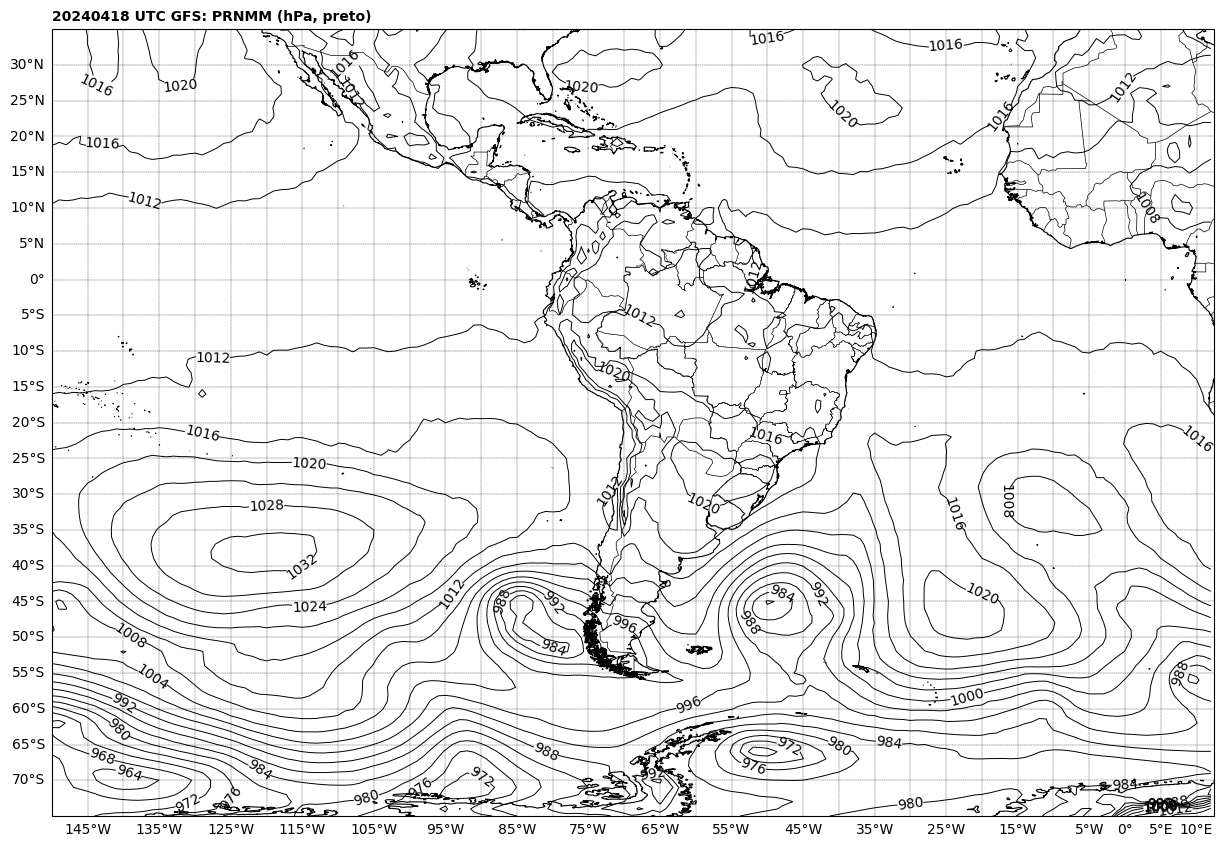

In [ ]:
plt.figure(figsize=(15,15))

# Use the Geostationary projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Define de contour interval
data_min = 900
data_max = 1050
interval = 4
levels = np.arange(data_min, data_max, interval)
# Plot the contours
img3 = ax.contour(lons, lats, mslp, colors='black', linewidths=0.7, levels=levels)
ax.clabel(img3, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'black')

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='black', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Add a title
plt.title(date + ' UTC' + ' GFS: PRNMM (hPa, preto)', fontweight='bold', fontsize=10, loc='left')
#plt.title('Reg.: ' + str(extent) , fontsize=10, loc='right')
#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig(f'{output}/PRNMM.png', bbox_inches='tight', pad_inches=0, dpi=300)

# Show the image
plt.show()

6. Plotar o campo da Altura Geopotencia nos níveis de 850 hPa, 500 hPa e 250 hPa

# **Altura Geopotencial**

A altura geopotencial (mgp) representa a altura real de uma superfície de pressão atmosférica acima da superfície terrestre, considerando a temperatura média da camada inferior.

Regiões frias apresentam alturas geopotencias menores do que regiões quentes. Os cavados estão relacionados a massas de ar frias. As cristas estão relacionadas com massas de ar quente ou relacionadas a processos de subsidência. A subsidência aquece o ar da coluna atmósferica devido à compressão adiabática, portanto gera um área de alta altura geopotencial.

**Cavado**

Um cavado é uma região de uma relativa baixa altura geopotencial em uma superfície isobárica. Em um cavado as isohipsas não são fechadas.

**Crista**

Uma crista é uma região de uma relativa alta altura geopotencial em uma superfície isobárica. Em uma crista as isohipsas não são fechadas. 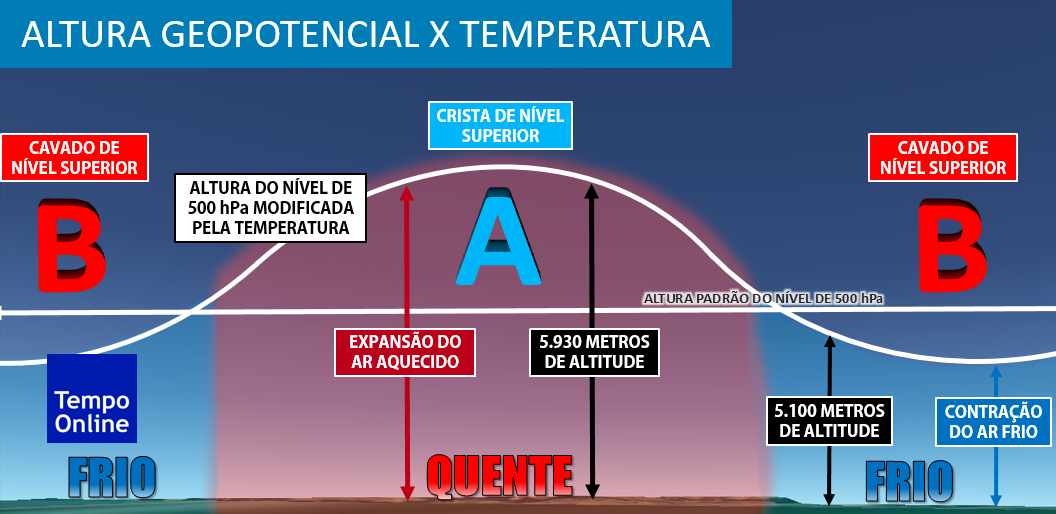

No Hemisfério Sul, o escoamento ao longo de um **cavado** apresenta curvatura ciclónica (ou giro horário) e o escoamento ao longo de uma **crista** apresenta curvatura anticiclónica (ou giro antihorário).  

**Na dianteira do eixo do cavado** se produz tempo ruim porque forma-se nebulosidade, produzem-se precipitações, às vecez ventos fortes e a pressão atmosférica em superfície começa a diminuir. Na dianteira de um cavado se produzem movimentos verticais ascendentes (entre o solo e os 10000 mêtros).


**Na dianteira do eixo da crista** é uma região de bom tempo. A nebulosidade se dissipa, pouco vento e a pressão atmosférica sobe.

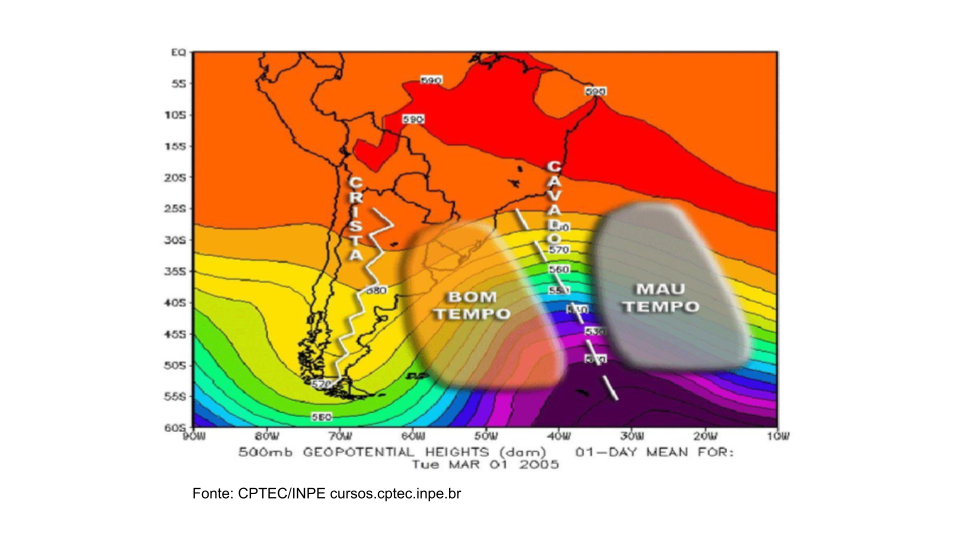

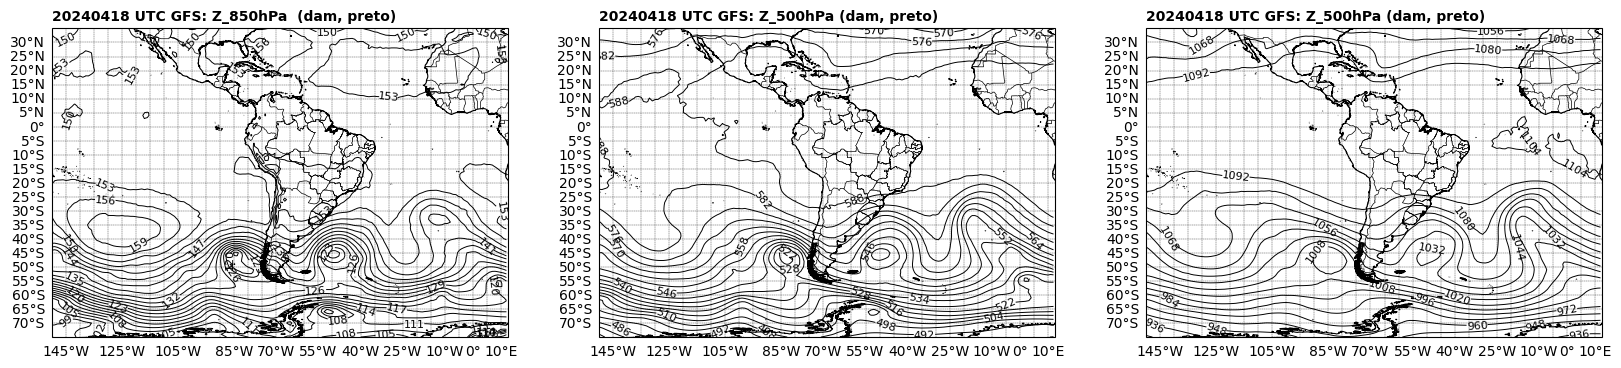

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,8), subplot_kw={'projection':ccrs.PlateCarree()}, sharey=True)

# ----------------------------------------------- 850hPa -------------------------------------------------------------------------------------------
# Use the Geostationary projection in cartopy
#ax[0] = plt.axes(projection=ccrs.PlateCarree())
ax[0].set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Define de contour interval
hght850_min = 0
hght850_max = 800
interval = 3
levels = np.arange(hght850_min, hght850_max, interval)
# Plot the contours
hght850 = ax[0].contour(lons, lats, hght_850/10, colors='black', linewidths=0.7, levels=levels)
ax[0].clabel(hght850, inline=1, inline_spacing=0, fontsize='8',fmt = '%1.0f', colors= 'black')

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax[0].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax[0].coastlines(resolution='10m', color='black', linewidth=0.8)
ax[0].add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax[0].gridlines(crs=ccrs.PlateCarree(), color='black', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Add a title
ax[0].set_title(date + ' UTC' + ' GFS: Z_850hPa  (dam, preto)', fontweight='bold', fontsize=10, loc='left')
#plt.title('Reg.: ' + str(extent) , fontsize=10, loc='right')

# ----------------------------------------------- 500hPa -------------------------------------------------------------------------------------------

# Use the Geostationary projection in cartopy
#ax[1] = plt.axes(projection=ccrs.PlateCarree())
ax[1].set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Define de contour interval
hght500_min = 0
hght500_max = 800
interval = 6
levels = np.arange(hght500_min, hght500_max, interval)
# Plot the contours
hght500 = ax[1].contour(lons, lats, hght_500/10, colors='black', linewidths=0.7, levels=levels)
ax[1].clabel(hght500, inline=1, inline_spacing=0, fontsize='8',fmt = '%1.0f', colors= 'black')

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax[1].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax[1].coastlines(resolution='10m', color='black', linewidth=0.8)
ax[1].add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax[1].gridlines(crs=ccrs.PlateCarree(), color='black', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Add a title
ax[1].set_title(date + ' UTC' + ' GFS: Z_500hPa (dam, preto)', fontweight='bold', fontsize=10, loc='left')
#plt.title('Reg.: ' + str(extent) , fontsize=10, loc='right')

# ----------------------------------------------- 200hPa -------------------------------------------------------------------------------------------

# Use the Geostationary projection in cartopy
#ax[2] = plt.axes(projection=ccrs.PlateCarree())
ax[2].set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Define de contour interval
hght250_min = 0
hght250_max = 2000
interval = 12
levels = np.arange(hght250_min, hght250_max, interval)
# Plot the contours
hght250 = ax[2].contour(lons, lats, hght_250/10, colors='black', linewidths=0.7, levels=levels)
ax[2].clabel(hght250, inline=1, inline_spacing=0, fontsize='8',fmt = '%1.0f', colors= 'black')

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax[2].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax[2].coastlines(resolution='10m', color='black', linewidth=0.8)
ax[2].add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax[2].gridlines(crs=ccrs.PlateCarree(), color='black', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Add a title
ax[2].set_title(date + ' UTC' + ' GFS: Z_500hPa (dam, preto)', fontweight='bold', fontsize=10, loc='left')
#plt.title('Reg.: ' + str(extent) , fontsize=10, loc='right')

#-----------------------------------------------------------------------------------------------------------
# Save the image
plt.savefig(f'{output}/hgt.png', bbox_inches='tight', pad_inches=0, dpi=300)

# Show the image
#plt.show()